In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%autosave 60

Autosaving every 60 seconds


# DSCI 235 Final Project
### By: Blake Davis

Data Source 1: https://www.kaggle.com/datasets/aliaamiri/2020-summer-olympics-dataset?select=2020_Olympics_Dataset.csv <br>
Data Source 2: https://www.kaggle.com/datasets/rio2016/olympic-games <br>
GitHub: https://github.com/bdavis12302/2020-2016-Summer-Olympic-Data <br>

## Project Description

For this project, I am analyzing data from the Tokyo 2020 Olympics and the Rio 2016 Olympics. The Olympic Games are a fascinating event, bringing the world together to appreciate excellence in athletics. The numerous different events, countries, and people competing in the Olympic Games give ample material to analyze. Finding patterns and interesting information in this Olympic data will likely change the way we see the games in the future and make us think about the nature of sports in a new way. This project will also be challenging and help us develop our teamwork, communication, and data wrangling skills. <br>

I am using 2 .csv files for our project. I have a main data set that is for the 2020 Summer Olympics in Tokyo. It includes data sorted by athlete name, with information on each athlete including age, country, sport, event, rank, and medal earned. The data set has multiple entries for each athlete as many athletes compete in multiple events. I have not decided how I am going to sort/filter the data for each individual athlete as they are each in the data set multiple times. I will use a 2016 Olympics in Rio De Janeiro data set to be able to determine if there were any repeat medalists and if there were more female or male medalists in 2016 vs. 2020. <br>

<hr>

I want to answer a few questions about the athletes that chose to compete in the 2016 and 2020 Summer Olympics:
1. What is the average age of an Olympic athlete in 2016? 2020? Compare.
   - Are there events that tend to have older competitors? Meaning, is the mean age of athletes competing in a specific event greater than 30?<br>
6. Who are the 5 oldest athletes and who are the 5 youngest athletes in 2016 and 2020?
   - What country are they from? <br>
   - What sport do they compete in? <br>
   - What does the age distribution of their sport in 2016 and 2020 look like, if available? <br>
   - Do any of them compete in the events that tend to have younger or older competitors, respectively? <br>
   - Did any of these athletes compete in 2016 and 2020?
5. Which Olympic athlete has the most medals in 2016? <br>
3. What are the top medaling countries in 2016? 2020? Compare.
4. Does the United States have more female or male medalists in 2020?
   - What is the average age of United States Male Medalists? Of United States Female Medalists? Of All United States Medalists?


In [2]:
olympics2020 = pd.read_csv('https://raw.githubusercontent.com/bdavis12302/2020-2016-Summer-Olympic-Data/main/SummerOlympicDatasets/2020_Olympics_Dataset.csv', encoding='latin-1')
olympics2016 = pd.read_csv('https://raw.githubusercontent.com/bdavis12302/2020-2016-Summer-Olympic-Data/main/SummerOlympicDatasets/2016_athletes.csv', encoding='latin-1')
display(olympics2016, olympics2020)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


,Unnamed: 0,Code,Name,Gender,Age,NOC,Country,Discipline,Sport,Event,Rank,Medal
0,1,1346266,AALERUD Katrine,Female,26,NOR,Norway,CRD,Cycling Road,Women's Road Race,37.0,NaN
1,2,1346266,AALERUD Katrine,Female,26,NOR,Norway,CRD,Cycling Road,Women's Individual Time Trial,20.0,NaN
2,3,1355250,ABAD Nestor,Male,28,ESP,Spain,GAR,Artistic Gymnastics,Men's All-Around,NaN,NaN
3,4,1355250,ABAD Nestor,Male,28,ESP,Spain,GAR,Artistic Gymnastics,Men's Floor Exercise,NaN,NaN
4,5,1355250,ABAD Nestor,Male,28,ESP,Spain,GAR,Artistic Gymnastics,Men's Pommel Horse,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15116,15117,1317127,ZWOLINSKA Klaudia,Female,22,POL,Poland,CSL,Canoe Slalom,Women's Kayak,5.0,NaN
15117,15118,1428770,ZYKOVA Yulia,Female,25,ROC,Russia,SHO,Shooting,50m Rifle 3 Positions Women,2.0,Silver
15118,15119,1435606,ZYUZINA Ekaterina,Female,24,ROC,Russia,SAL,Sailing,Women's One Person Dinghy - Laser Radial,27.0,NaN
15119,15120,1325697,ZYZANSKA Sylwia,Female,24,POL,Poland,ARC,Archery,Women's Individual,33.0,NaN


## *Note: The 2020 Summer Olympics were held in 2021 due to the Coronavirus Pandemic.*

## Part 1: What is the average age of an Olympic athlete in 2016? 2020? Compare

In [3]:
avgAge20 = olympics2020['Age'].mean()
avgAge20

26.765227167515377

In [4]:
olympics2016.loc[8546,'dob'] = "12/25/87" #Had to Google this guy's birthday because it was missing from the dataset
startDate2016 = pd.to_datetime("08/05/16")

olympics2016['dob'] = pd.to_datetime(olympics2016['dob'])
olympics2016['dob'] = np.where(olympics2016['dob'].dt.year > 2022, olympics2016['dob'] - pd.offsets.DateOffset(years=100), olympics2016['dob'])
# For some reason unknown, python decided that 2071 was somehow in the past, so we had to force it to go to 1971
olympics2016['age'] = abs(olympics2016['dob'] - startDate2016)
olympics2016['age'] = (np.floor((olympics2016['age'].dt.days)/365)).astype(int)
avgAge16 = olympics2016['age'].mean()
avgAge16

26.33974692321026

### Are there events that tend to have older competitors? <br> Meaning, is the mean age of athletes competing in a specific event greater than 30? Greater than 28?

In [5]:
meanAgeSport2016 = olympics2016.groupby("sport")["age"].mean()
meanAgeSport2020 = olympics2020.groupby("Sport")["Age"].mean()
ageGT302016 = meanAgeSport2016[meanAgeSport2016 > 30]
ageGT302020 = meanAgeSport2020[meanAgeSport2020 > 30]
print("Sports with an average (mean) age that is greater than 30 in 2016:", ageGT302016)
print("Sports with an average (mean) age that is greater than 30 in 2020:", ageGT302020)

Sports with an average (mean) age that is greater than 30 in 2016: sport
equestrian    37.261261
shooting      31.369231
Name: age, dtype: float64
Sports with an average (mean) age that is greater than 30 in 2020: Sport
Beach Volleyball    30.052083
Equestrian          38.097619
Shooting            30.097054
Name: Age, dtype: float64


In [6]:
meanAgeSport2016 = olympics2016.groupby("sport")["age"].mean()
meanAgeSport2020 = olympics2020.groupby("Sport")["Age"].mean()
ageGT282016 = meanAgeSport2016[meanAgeSport2016 > 28]
ageGT282020 = meanAgeSport2020[meanAgeSport2020 > 28]
print("Sports with an average (mean) age that is greater than 28 in 2016:", ageGT282016)
print("Sports with an average (mean) age that is greater than 28 in 2020:", ageGT282020)

Sports with an average (mean) age that is greater than 28 in 2016: sport
equestrian    37.261261
golf          29.591667
shooting      31.369231
tennis        28.066327
Name: age, dtype: float64
Sports with an average (mean) age that is greater than 28 in 2020: Sport
3x3 Basketball           28.437500
Baseball/Softball        29.051282
Beach Volleyball         30.052083
Cycling Mountain Bike    28.421053
Cycling Road             28.803089
Equestrian               38.097619
Fencing                  28.088305
Golf                     28.200000
Handball                 28.649457
Karate                   28.012346
Sailing                  28.860000
Shooting                 30.097054
Table Tennis             29.068441
Tennis                   28.434483
Triathlon                28.730769
Name: Age, dtype: float64


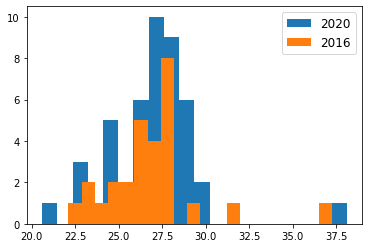

In [7]:
%matplotlib inline
num_bins=20
plt.hist(meanAgeSport2020, num_bins, label='2020')
plt.hist(meanAgeSport2016, num_bins, label='2016')
# Graphed in this order so that the 2016 would sit on top of 2020.
plt.legend(loc='upper right', fontsize='12');

### Results:

 - The average age for the athletes competing in the 2016 and 2020 Summer Olympics is approximately 26 years of age. There are a few sports that have an average age that is a bit older. <br>

 - There are 2 sports in 2016 that have an average age of 30 and above. In 2016, the two sports are Equestrian and Shooting. There are 3 sports with an average age of 30 and above in 2020, which are Beach Volleyball, Equestrian, and Shooting. We can deduce that Equestrian and Shooting are two sports that may generally have older competitors as they have an average age of 30 or above. <br>

 - You can also see that if we look at the sports that include competitors with an average age of 28 or greater, there are a lot more events returned. This makes sense as 28 is closer to the mean age of 26, than 30. <br>
 
 - We can see from the graph above that both the 2016 and 2020 Summer Olympics both have a mean age around 26 years of age, matching what was calculated above. Both graphs are right skewed.
 
 - We can also see from the graph that a lot more events in 2020 have an average age greater than 28.

## Part 2: Who are the 5 oldest athletes and who are the 5 youngest athletes in 2020?
### What country are these athletes from?

In [8]:
olympics2020SortedByAgeNoDup = olympics2020.sort_values(by="Age", ascending = True).drop_duplicates(subset=['Name'])
olympics2016SortedByAgeNoDup = olympics2016.sort_values(by="age", ascending = True)
olympics2016Young5 = olympics2016SortedByAgeNoDup.loc[:,('name','sport','nationality','age')].head(5)
olympics2016Old5 = olympics2016SortedByAgeNoDup.loc[:,('name','sport','nationality','age')].tail(5)
olympics2020Young5 = olympics2020SortedByAgeNoDup.loc[:,('Name','Sport','Country','Age',)].head(5)
olympics2020Old5 = olympics2020SortedByAgeNoDup.loc[:,('Name','Sport','Country','Age',)].tail(5)
print("The five youngest athletes and their countries in the 2016 summer olympics are:\n", olympics2016Young5,'\n')
print("The five youngest athletes and their countries in the 2020 summer olympics are:\n", olympics2020Young5,'\n')
print("The five oldest athletes and their countries in the 2016 summer olympics are:\n", olympics2016Old5,'\n')
print("The five oldest athletes and their countries in the 2020 summer olympics are:\n", olympics2020Old5)

The five youngest athletes and their countries in the 2016 summer olympics are:
                        name     sport nationality  age
654        Ana Iulia Dascal  aquatics         ROU   13
3598          Gaurika Singh  aquatics         NEP   13
10433           Thint Myaat  aquatics         MYA   14
9918   Siri Arun Budcharern  aquatics         LAO   14
715      Anastasiya Tyurina  aquatics         TJK   14 

The five youngest athletes and their countries in the 2020 summer olympics are:
                  Name          Sport        Country  Age
5324    HIRAKI Kokona  Skateboarding          Japan   12
14944       ZAZA Hend   Table Tennis          Syria   12
9549   NISHIYA Momiji  Skateboarding          Japan   13
1764        BROWN Sky  Skateboarding  Great Britain   13
7294      LEAL Rayssa  Skateboarding         Brazil   13 

The five oldest athletes and their countries in the 2016 summer olympics are:
                  name       sport nationality  age
10185   Suzanne Hearn  equestria

AUS - Australia<br>
GBR -> Great Britain<br>
LAO - Laos<br>
MYA -> Myanmar<br>
NEP -> Nepal<br>
NZL -> New Zealand<br>
TJK -> Tajikistan<br>
ROU -> Romania

*Note: The country abbreviation codes are labeled/identified above for convenience.*

*Note:* These are the top 5 youngest and oldest athletes based on age and then sorted by some secondary factor. <br> I used the top 5 rows once it was sorted by age.

We can see above that these athletes, both young and old, come from a variety of different countries. We can see some patterns in the events that these athletes compete in, that is what we are going to look at next!

### Age distribution of all athletes in the 2016 and 2020 Summer Olympics.

<AxesSubplot:title={'center':'Age Dist. of athletes in 2020'}>

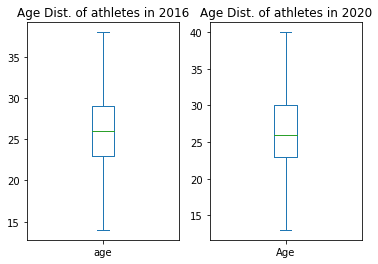

In [9]:
olympics2016AgeSorted = olympics2016SortedByAgeNoDup["age"]
plt.subplot(121)
olympics2016AgeSorted.plot.box(showfliers=False, title="Age Dist. of athletes in 2016")
plt.subplot(122)
olympics2020AgeSorted = olympics2020SortedByAgeNoDup["Age"]
olympics2020AgeSorted.plot.box(showfliers=False, title="Age Dist. of athletes in 2020")
#Outliers have been removed/filtered out

*Note: This is the same age data as graphed above without competitor duplicates and displayed in a different format in order to see a better distribution rather than just the mean (average) age for each event. Also, the outliers have been filtered out.*

### What sport do these young and old competitors compete in?

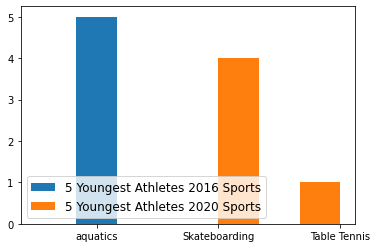

In [10]:
%matplotlib inline
num_bins=3
young2016Olympics = olympics2016Young5['sport']
young2020Olympics = olympics2020Young5['Sport']
plt.hist(young2016Olympics, num_bins, label="5 Youngest Athletes 2016 Sports")
plt.hist(young2020Olympics, num_bins, label="5 Youngest Athletes 2020 Sports")
plt.legend(loc='lower left', fontsize='12');

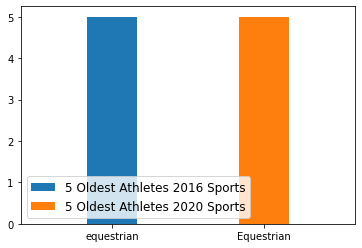

In [11]:
%matplotlib inline
num_bins=3
old2016Olympics = olympics2016Old5['sport']
old2020Olympics = olympics2020Old5['Sport']
plt.hist(old2016Olympics, num_bins, label="5 Oldest Athletes 2016 Sports")
plt.hist(old2020Olympics, num_bins, label="5 Oldest Athletes 2020 Sports")
plt.legend(loc='lower left', fontsize='12');

We can see that the youngest athletes from 2016 competed purely in aquatics, and the youngest athletes in 2020 were competitors in Skateboarding and Table Tennis. The oldest athletes from 2016 and 2020 both competed purely as Equestrians.<br>
What does that say about the distribution of each of their sports?

 ### What does the age distribution of their sport in 2016 and 2020 look like, if available? What conclusion can we draw from that?

#### Age Distribution of Aquatic Athletes in 2016

Text(0.5, 1.0, 'Age Distribution of Aquatic Athletes in 2016')

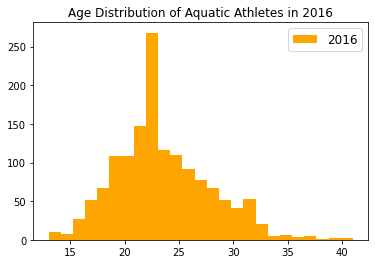

In [12]:
%matplotlib inline
num_bins=25
aquaticsAge2016 = olympics2016[olympics2016['sport'] == 'aquatics']['age']
plt.hist(aquaticsAge2016, num_bins, label="2016", color='orange')
plt.legend(loc='upper right', fontsize='12');
plt.title("Age Distribution of Aquatic Athletes in 2016")
# A lot aquatics among younger athletes

In [13]:
print("The mean age of Aquatic Athletes in 2016 is", aquaticsAge2016.mean(), "years old.")

The mean age of Aquatic Athletes in 2016 is 23.447750865051905 years old.


*Note: There is No "Aquatics" Event in 2020 as the data is Sorted Differently.*

We can see that the age distribution of aquatic athletes in 2016 is heavily right skewed and there aren't any aquatic athletes over the age of 45 in the 2016 Summer Olympics. This makes sense as all of our 5 youngest athletes in 2016 are 13 and 14 years old and compete in aquatics. The mean age for aquatic athletes in 2016 is 23 years old which is lower than the olympic athlete average age of 26 in 2016. This makes sense as the graph is heavily right skewed.

#### Age Distribution of Skate Boarders in 2020

Text(0.5, 1.0, 'Age Distribution of Skateboarders in 2020')

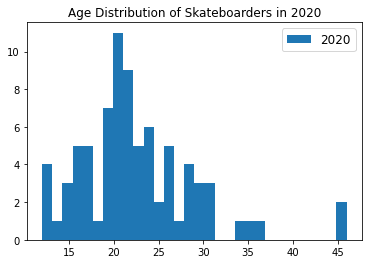

In [14]:
%matplotlib inline
num_bins=30
skateboardingAge2020 = olympics2020[olympics2020['Sport'] == 'Skateboarding']['Age']
plt.hist(skateboardingAge2020, num_bins, label="2020")
plt.legend(loc='upper right', fontsize='12');
plt.title("Age Distribution of Skateboarders in 2020")
# A lot skateboarding among younger athletes

In [15]:
print("The mean age of Skate Boarders in 2020 is", skateboardingAge2020.mean(), "years old.")

The mean age of Skate Boarders in 2020 is 22.575 years old.


*Note: There is No "Skateboarding" Event in 2016 as the data is Sorted Differently.*

4 of the youngest athletes in the 2020 Summer Olympics competed in Skateboarding. Looking at the age distribution, we can see that this graph is heavily right skewed. We can also tell from the graph that there aren't very many skateboarding comepetitors, which gives us a small sample size. This allows us to inquire, what is the average age and age distribution of skateboarders in other competitions, specifically skateboarding competitions? Does it differ from the average age and age distribution of skateboarders in the 2020 Summer Olympics?

#### Age Distribution of Athletes that play Table Tennis in 2016 and 2020

Text(0, 0.5, 'Number of Athletes')

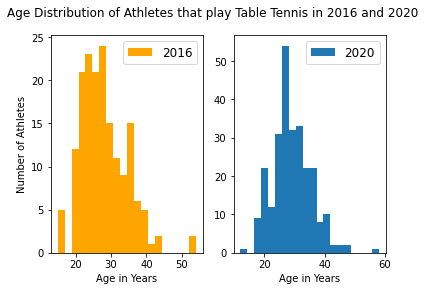

In [16]:
%matplotlib inline
num_bins=20
tableTennisAge2020 = olympics2020[olympics2020['Sport'] == 'Table Tennis']['Age']
tableTennisAge2016 = olympics2016[olympics2016['sport'] == 'table tennis']['age']
plt.subplot(122)
plt.hist(tableTennisAge2020, num_bins, label="2020")
plt.legend(loc='upper right', fontsize='12');
plt.xlabel("Age in Years")
plt.subplot(121)
plt.hist(tableTennisAge2016, num_bins, label="2016", color='orange')
plt.legend(loc='upper right', fontsize='12');
plt.suptitle("Age Distribution of Athletes that play Table Tennis in 2016 and 2020")
plt.xlabel("Age in Years")
plt.ylabel("Number of Athletes")
# The young table tennis player seems to be an outlier, cool learning from data

In [17]:
print("The mean age of Athletes that play Table Tennis in 2016 is", tableTennisAge2016.mean(), "years old.")
print("The mean age of Athletes that play Table Tennis in 2020 is", tableTennisAge2020.mean(), "years old.")

The mean age of Athletes that play Table Tennis in 2016 is 27.75581395348837 years old.
The mean age of Athletes that play Table Tennis in 2020 is 29.068441064638783 years old.


Both, the 2016 and 2020 Summer Olympic Datasets, have Table Tennis included so we can do a direct comparison of the age distribution of the event in both olympics. We can see from both histograms that the age distribution is right skewed with a few outliers on each end of the distribution. These graphs are not as heavily right skewed as the Aquatics event from 2016 as there are no competitors over the age of 45 in that event, but table tennis still has quite a few competitors that are in the younger age bracket, making the histogram right skewed. 

#### Age Distribution of Equestrians in 2016 and 2020

Text(0, 0.5, 'Number of Athletes')

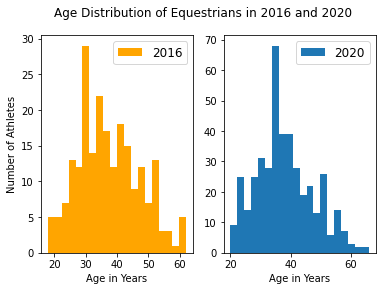

In [18]:
%matplotlib inline
num_bins=20
equestrianAge2020 = olympics2020[olympics2020['Sport'] == 'Equestrian']['Age']
equestrianAge2016 = olympics2016[olympics2016['sport'] == 'equestrian']['age']
plt.subplot(122)
plt.hist(equestrianAge2020, num_bins, label="2020")
plt.legend(loc='upper right', fontsize='12');
plt.xlabel("Age in Years")
plt.subplot(121)
plt.hist(equestrianAge2016, num_bins, label="2016", color='orange')
plt.legend(loc='upper right', fontsize='12');
plt.suptitle("Age Distribution of Equestrians in 2016 and 2020")
plt.xlabel("Age in Years")
plt.ylabel("Number of Athletes")
# Lots of Equestrians among older athletes

In [19]:
print("The mean age of Equestrians in 2016 is", equestrianAge2016.mean(), "years old.")
print("The mean age of Equestrians in 2020 is", equestrianAge2020.mean(), "years old.")

The mean age of Equestrians in 2016 is 37.26126126126126 years old.
The mean age of Equestrians in 2020 is 38.09761904761905 years old.


Both, the 2016 and 2020 Summer Olympic Datasets, have Equestrian included so we can do a direct comparison of the age distribution of the event in both olympics. We can see that the age data associated with equestrians is more spread out than other sports such as aquatics or skateboarding. This means that for equestrians, it is more likely to have an older athlete competing as the distribution is closer to uniform than in the sports, like aquatics or skateboarding, where the graph is heavily right skewed because the athletes in that sport are generally younger.

### Do any of the older or younger athletes compete in events that tend to have younger or older competitors, respectively?

Yes, all of these athletes compete in events that tend to have younger or older competitors, respectively. All of the younger athletes, specifically the top 5 in our case, compete in events that are heavily right skewed. This demonstrates that this event tends to have younger athletes competing. For the older compeditors, specifically the top 5 in our data, compete in the same event, Equestrian. The Equestrian event has a different distibution than the other events we looked at because the mean age of competitors in the Equestrian event is over the age of 30. //TODO

### Did any of these athletes compete in 2016 and 2020?

In [20]:
print(olympics2016Old5["name"])
print(olympics2020Old5["Name"])

10185     Suzanne Hearn
6982          Mark Todd
7092         Mary Hanna
5045      John Whitaker
5299     Julie Brougham
Name: name, dtype: object
9952     OUADDAR Abdelkebir
10489          PINTO Carlos
4817         GULLIKSEN Geir
5506             HOY Andrew
4980             HANNA Mary
Name: Name, dtype: object


Through visual inspection, we can see that one older athlete, Mary Hanna, competed in both the 2016 and 2020 Summer Olympic Games.

In [21]:
print(olympics2016Young5["name"])
print(olympics2020Young5["Name"])

654          Ana Iulia Dascal
3598            Gaurika Singh
10433             Thint Myaat
9918     Siri Arun Budcharern
715        Anastasiya Tyurina
Name: name, dtype: object
5324      HIRAKI Kokona
14944         ZAZA Hend
9549     NISHIYA Momiji
1764          BROWN Sky
7294        LEAL Rayssa
Name: Name, dtype: object


Through visual inspection, we can see that none of the younger athletes competed in both the 2016 and 2020 Summer Olympic Games.

We cannot use numpy or pandas to check if the any of the athletes competed in both 2016 and 2020 as the names are formatted differently in the 2 datasets.

### Results:

## Part 3: Which Olympic athlete has the most medals in 2016?

In [22]:
olympics2016['numMedals'] = olympics2016['gold'] + olympics2016['silver'] + olympics2016['bronze']
sortByNumMedals2016 = olympics2016.sort_values(by="numMedals", ascending = False)
topAthlete2016 = sortByNumMedals2016.head(1)
topAthlete2016

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,numMedals
7401,491565031,Michael Phelps,USA,male,1985-06-30,1.94,90.0,aquatics,5,1,0,31,6


## Part 4: What are the top 10 medaling countries in 2016? 2020? Compare.

In [23]:
olympics2016.groupby('nationality').aggregate('sum').sort_values(by='gold', ascending=False).head(10)
olympics2016.groupby('nationality').aggregate('sum').sort_values(by='numMedals', ascending=False)['numMedals'].head(10)

nationality
USA    264
GER    160
GBR    145
RUS    115
CHN    113
FRA     95
AUS     82
ITA     72
CAN     69
JPN     65
Name: numMedals, dtype: int64

In [24]:
olympics2020.groupby('Country').aggregate('count').sort_values(by='Medal', ascending=False)['Medal'].head(10)

Country
United States    298
Russia           149
France           141
China            141
Great Britain    141
Japan            131
Australia        131
Canada            85
Germany           81
Italy             76
Name: Medal, dtype: int64

### Results:

Shown above are the top medaling countries in the 2016 and 2020 Summer Olympics. 
 - We can see that the United States is the top country in number of medals won in both the 2016 and 2020 Summer Olympics.
 - We can also see that the other top 9 teams are the same teams in 2016 and 2020, but just in a different order.
 - **__This creates a question for further inquiry:__** How many years in the history of the summer olympics do we have these top 10 countries in the top 10? Is there something about these countries that helps them achieve this?

## Part 5: Does the United States have more female or male medalists in 2020?

<BarContainer object of 1 artists>

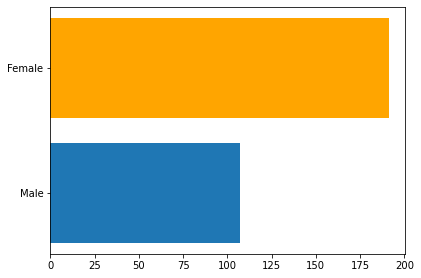

In [25]:
%matplotlib inline

usAthletes = olympics2020.loc[olympics2020['Country'] == 'United States']
usMedalists = usAthletes.loc[pd.notna(usAthletes['Medal'])]
usMedalistsGender = usMedalists['Gender']
plt.figure(figsize=(14, 10))
plt.subplot(221)
maleUS = usMedalists[usMedalists['Gender'] == 'Male']
plt.barh("Male", maleUS['Gender'].count())
plt.subplot(221)
femaleUS = usMedalists[usMedalists['Gender'] == 'Female']
plt.barh("Female", femaleUS['Gender'].count(), color='orange')

In [26]:
countMale = maleUS['Name'].count()
countFemale = femaleUS['Name'].count()
totalMedalists = countMale + countFemale;
totalMedalists
# This demonstrates that the number female and male United States medalists in Summer 2020 equals
# the total number of United States medalists in 2020.

298

We can clearly see that there are more female medalists than male medalists in 2020 for the United States. We also know that our data makes sense because when we add the number of rows from each subset of medalists, both male and female, we get the total number of medalists.

### What is the average age of United States Male Medalists? Of United States Female Medalists? Of All United States Medalists?

In [27]:
maleUSMeanAge = maleUS['Age'].mean()
maleUSMeanAge

26.85981308411215

In [28]:
femaleUSMeanAge = femaleUS['Age'].mean()
femaleUSMeanAge

26.465968586387433

In [29]:
usMedalistsMeanAge = usMedalists['Age'].mean()
usMedalistsMeanAge

26.607382550335572

#### How do these comapare to the average age of all olympic athletes in the 2020 Summer Olympics?

*Analysis:*

## Conclusion

CONCLUSION

## Future Questions of Inquiry

3-4 Questions